In [15]:
# cd to base directory of this repository to enable the loading of NEURON simulations
import os
os.chdir('/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim')
from neuron import h
from neurostim.cell import Cell
from neurostim.light_classes import LightSource, LightStimulation
from neurostim.utils import convert_polar_to_cartesian_xz, interpolate
from neurostim.polarmaps import get_AP_times, simple_polar_map
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import jet as cmap
import matplotlib
from neurostim.light_propagation_models import foutz_et_al2012
import pickle
import pandas as pd
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

# NEURON setup
h.load_file("stdrun.hoc")
h.cvode_active(1)
# load cell and create stimulation object
hoc_file = 'L5'
chanrhod_expression = 13e9
chanrhod_distribution = 'uniform'
cortical_depth = {'L5':1170}
    
cell = Cell(
    hoc_file="simneurostim/model/hoc/" + str(hoc_file) + ".hoc",
    cortical_depth=cortical_depth,
    ChR_soma_density=float(chanrhod_expression),
    ChR_distribution=str(chanrhod_distribution),
    rm_mech_from_secs=None,
    delete_all_secs_except_soma=False
)

In [11]:
# dimensions (A4:  8.27 x 11.69 inches)
text_frac = 0.8
abs_pw = 8.27 # pagewidth
abs_pl = 11.69 # pagelength
pw = text_frac * abs_pw
pl = text_frac * abs_pl

# others
dpi=900

In [9]:
light_model = 'foutz_et_al2012'
light_delay = 10
light_duration = 200
tot_rec_time = 250

diameters = [25, 200, 400]
NAs = [0.1, 0.22, 0.5]

results = []
for diam, NA in zip(diameters,NAs):
    print('1')
    light_energy_absorbed = []
    for radius in np.arange(0,1000,25):
        for angle in np.arange(0,2*np.pi,np.pi/8):
            # light source initialization
            light_x, light_y = convert_polar_to_cartesian_xz(radius, angle)
            light_z = 0  # cortical surface
            light_pos = (light_x, light_y, light_z)
            light_source = LightSource(
                model=light_model,
                position=(light_x, light_y, light_z),
                width=float(diam),
                NA=float(NA)
            )
            # stimulation object initialization
            light_stim = LightStimulation(
                cell=cell,
                light_source=light_source,
                delay=1,
                duration=200,
                light_power=1,
                record_all_segments=False,
            )
            segs, Txs = light_stim.get_segs_Txs()
            light_energy_absorbed.append({
                'diam': diam,
                'NA': NA,
                'radius [um]': radius,
                'angle [rad]': angle,
                'total_light_energy_absorbed': np.sum([seg.area() * Tx for seg, Tx in zip(segs, Txs)]),
                'max_seg_light_energy_absorbed': np.max([seg.area() * Tx for seg, Tx in zip(segs, Txs)])
            })
    lea_df = pd.DataFrame(light_energy_absorbed)
    lea_df['total_light_energy_absorbed'] = lea_df['total_light_energy_absorbed'] / lea_df['total_light_energy_absorbed'].max()
    lea_df['max_seg_energy_absorbed'] = lea_df['max_seg_light_energy_absorbed'] / lea_df['max_seg_light_energy_absorbed'].max()
    lea_df['total_light_energy_absorbed'].loc[lea_df['total_light_energy_absorbed']<=0.001] = np.nan
    lea_df['max_seg_energy_absorbed'].loc[lea_df['max_seg_energy_absorbed']<=0.001] = np.nan
    results.append(lea_df)

1


/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


1


/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


1


/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


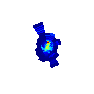

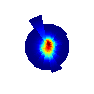

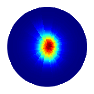

In [16]:
for lea_df in results:
    # total light energy absorbed by the neuron
    fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                            wspace=0.05)
    ax = fig.add_subplot(gs[0,0], projection="polar")
    ax, mappable = simple_polar_map(
            data=lea_df,
            plot_col='total_light_energy_absorbed',
            cmap=cmap,
            ax=ax,
            vmin=0,
            vmax=1)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    #plt.colorbar(mappable)
    #plt.title(str(lp))
    #plt.savefig('paper/NEW_FIGURES/FIG2/plots/tmp_total_lea.png', dpi=dpi)
    plt.show()

In [ ]:
# total light energy absorbed by the neuron
fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                        wspace=0.05)
ax = fig.add_subplot(gs[0,0], projection="polar")
ax, mappable = simple_polar_map(
        data=lea_df,
        plot_col='max_seg_energy_absorbed',
        cmap=cmap,
        ax=ax,
        vmin=0,
        vmax=1)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
#plt.colorbar(mappable)
#plt.title(str(lp))
#plt.savefig('paper/NEW_FIGURES/FIG2/plots/tmp_max_seg_lea.png', dpi=dpi)
plt.show()